# HW5: Machine Learning

Due: May 15, 11:59 PM.

## Please restart the kernel and run all before you submit ! (-1 Point if you forget to do it)

## Your name (-1 Point if you do not type your name here): Anshika Khandelwal

In [28]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

## Load dataset

This is a classification dataset. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Run the following cell to load features (X) and labels (y).

In [29]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target

In [30]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(pd.unique(df['target']))

[0 1]


## Part 1: Train test split:

Use 80% of the data to train the model and 20% of the data to test.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Question: Why do you need to do train_test split before your run dimension reduction algorithms?**

Answer: By doing the train test split before the dimension reduction, it ensures that the dimension reduction process is based only on the training data, and the test data remains unseen. If it were done after, then the model would be biased and it would not be possible to tell if the model generalises well onto unseen data because all data is already familiar. 

## Part 2: Dimension Reduction and visualization

Please implement PCA, kernel PCA and LLE for **training data samples**, and then visualize reduced training data samples in 2D-plane.

Requirements:

1. You should pick a good kernel/hyperparameter for kernel PCA, and number of neighborhoods for LLE. You do not need to show the process.

2. You should include all visualizations in one Figure using subplots. You should add x-label, y-label, legend, and title to make your plots clear. Moreover, you should include the used kernel/hyperparameters for kernel PCA visualization. Please see my sample plots below. Your plots can be different from my plots if parameters are different. But the layout (plot labels, lengends, and etc) should be similar.

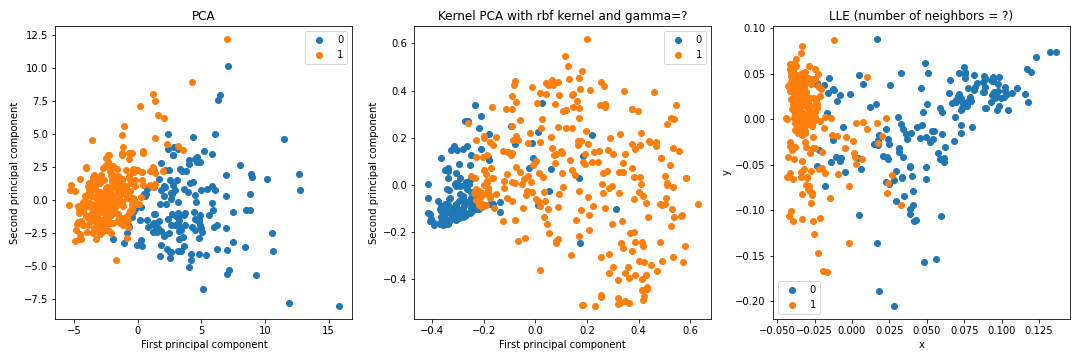

3. In-line comments are required to explain your codes.

Grading is based on the following:
1. You should implement each algorithm correctly. 
2. Comments are included. 
3. Visualization is clear and meets the requirements.





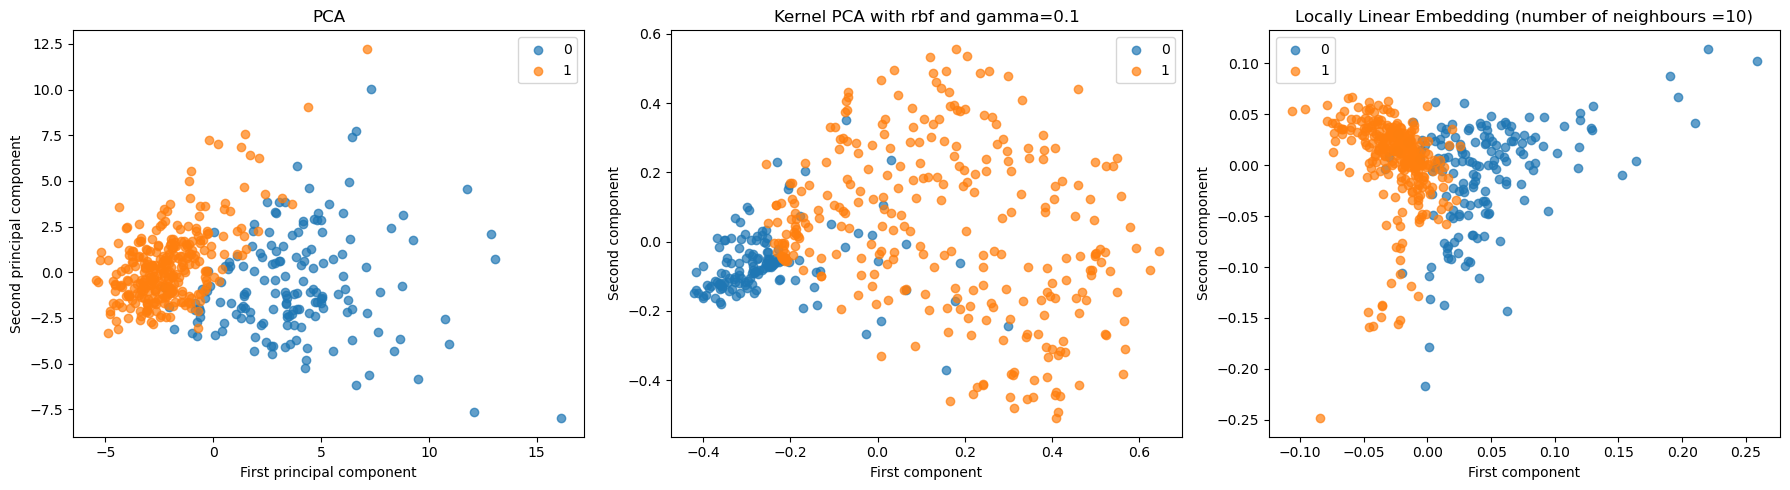

In [33]:
#standardising the training and testing data using information from training data
X_standard = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_standard = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Perform PCA
pca = PCA(n_components=2, svd_solver='full')
X_pca = pca.fit_transform(X_standard)

# Perform Kernel PCA
#kernel_pca = KernelPCA(n_components=2, kernel='linear')
#kernel_pca = KernelPCA(n_components=2, kernel='poly', degree=3)
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kernel_pca = kernel_pca.fit_transform(X_standard)

# Perform LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_lle = lle.fit_transform(X_standard)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA Plot
axes[0].scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], label='0', alpha=0.7)
axes[0].scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], label='1', alpha=0.7)
axes[0].set_xlabel('First principal component')
axes[0].set_ylabel('Second principal component')
axes[0].legend()
axes[0].set_title('PCA')

# Kernel PCA Plot
axes[1].scatter(X_kernel_pca[y_train == 0, 0], X_kernel_pca[y_train == 0, 1], label='0', alpha=0.7)
axes[1].scatter(X_kernel_pca[y_train == 1, 0], X_kernel_pca[y_train == 1, 1], label='1', alpha=0.7)
axes[1].set_xlabel('First component')
axes[1].set_ylabel('Second component')
axes[1].legend()
axes[1].set_title('Kernel PCA with rbf and gamma=0.1')

# LLE Plot
axes[2].scatter(X_lle[y_train == 0, 0], X_lle[y_train == 0, 1], label='0', alpha=0.7)
axes[2].scatter(X_lle[y_train == 1, 0], X_lle[y_train == 1, 1], label='1', alpha=0.7)
axes[2].set_xlabel('First component')
axes[2].set_ylabel('Second component')
axes[2].legend()
axes[2].set_title('Locally Linear Embedding (number of neighbours =10)')

plt.tight_layout()
plt.show()

## Part 3: Train classification models

In this part, you will train several models using **reduced training samples**.

* First of all, based on your visualization result in part 2, please determine which dimension reduction technique you want to use for part 3 and state the reason.

* Second, please do dimension reduction on training samples using the technique you select. (This step is the same as part 2, so you do not need to repeat the code, you can use what you obtain from part 2)

* Third, you should train k-nearest-neighbors, logistic regression, decision tree, random forest, and voting classifier models (use all models mention before) on reduced training samples and then report test accuracy.

* Last, show the decision region for each model. Please look at this reference [code](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) and visualize the decision regions. You should write a function to draw decision region for any classification model and any data samples. Function docstring is required.

Please follow the following instructions and finish part 3. Inline comments are required for your code.

#### 3(a) Determine the dimension reduction technique you will use and state the reason

PCA because this is a classification problem, and the graphs show that PCA reduction allows for the data to be separated successfully. The Kernal PCA and LLN have more of the different classification data points mixing, making it harder to separate and therefore make correct classification predicitons. 

#### 3(b) Do dimension reduction

You can repeat part 2 or use results from part 2

In [44]:
#### Your code here
X_pca = pca.fit_transform(X_standard)
X_test_pca = pca.transform(X_test_standard)

#### 3(c) Write a function to draw decision region

Your function looks similar as the function in the sample codes, but you should modify the code because it only works for penguin data.

Docsting and inline comments are required.

In [46]:
#### Your function here
def plot_regions(model, X, y):
    """
    Plot decision regions for a classification model.

    Parameters:
    model: The trained classification model.
    X: Input features
    y: Target/Goal labels

    Returns: None
    """
    # Get features
    x0 = X[:, 0]
    x1 = X[:, 1]

    # Create a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # Make predictions on the grid
    XY = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(XY)
    predictions = predictions.reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, predictions, cmap="jet", alpha=0.2)

    # Plot data points
    plt.scatter(x0, x1, c=y, cmap="jet", alpha=0.7)

    # Set labels
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Show plot
    plt.show()

#### 3(d) Train k-nearest-neighbors model

You should try different k's and select the best one. You can either use cross-validation or train models using different k manually.

Print the test accuracy for all models, and draw the decision region for the model with the best k.

KNN with k=1: Test accuracy = 0.92
KNN with k=2: Test accuracy = 0.92
KNN with k=3: Test accuracy = 0.94
KNN with k=4: Test accuracy = 0.94
KNN with k=5: Test accuracy = 0.94
KNN with k=6: Test accuracy = 0.96
KNN with k=7: Test accuracy = 0.95
KNN with k=8: Test accuracy = 0.96
KNN with k=9: Test accuracy = 0.95
KNN with k=10: Test accuracy = 0.96
Best KNN model has k=6 with test accuracy = 0.96


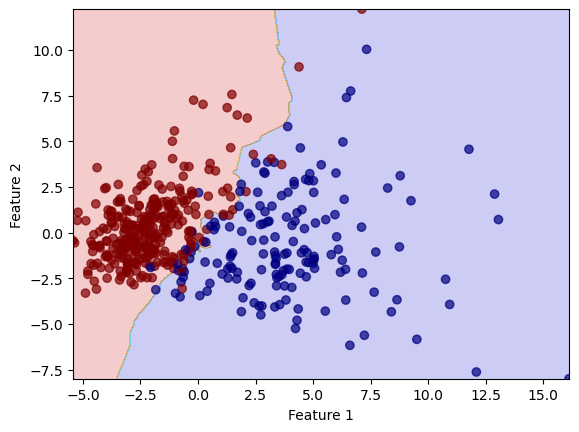

In [47]:
#### Your code here
from sklearn.neighbors import KNeighborsClassifier

# Train k-nearest-neighbors model with different k's
best_k = None
best_accuracy = 0

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_pca, y_train)
    accuracy = knn.score(X_test_pca, y_test)
    
    print(f'KNN with k={k}: Test accuracy = {accuracy:.2f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f'Best KNN model has k={best_k} with test accuracy = {best_accuracy:.2f}')

# Plot decision region for the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_pca, y_train)
plot_regions(best_knn, X_pca, y_train)

#### 3(e) Train logistic regression model

No hyperparameter selection needed. 

Print the test accuracy, and draw the decision region.

Test accuracy is 0.95


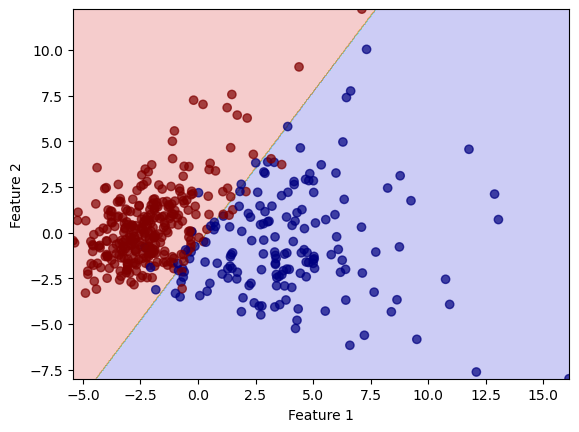

In [48]:
#### Your code here
from sklearn.linear_model import LogisticRegression

Log = LogisticRegression().fit(X_pca, y_train)

# test accuracy
y_pred = Log.predict(X_test_pca)
acc = Log.score(X_test_pca, y_test)
print(f'Test accuracy is {acc:.2f}')

# Plot decision region for LR model
plot_regions(Log, X_pca, y_train)

#### 3(f) Train decision tree

You should try different `max_depth` and select the best one.

Print the test accuracy for all models, and draw the decision region with the best `max_depth`.

Test accuracy for depth of 1 is 0.95
Test accuracy for depth of 2 is 0.95
Test accuracy for depth of 3 is 0.96
Test accuracy for depth of 4 is 0.95
Test accuracy for depth of 5 is 0.96
Test accuracy for depth of 6 is 0.96
Test accuracy for depth of 7 is 0.96
Test accuracy for depth of 8 is 0.96
Test accuracy for depth of 9 is 0.96
Test accuracy for depth of 10 is 0.96
Test accuracy for depth of 11 is 0.96
Test accuracy for depth of 12 is 0.96
Test accuracy for depth of 13 is 0.96
Test accuracy for depth of 14 is 0.96
Test accuracy for depth of 15 is 0.94
Test accuracy for depth of 16 is 0.96
Test accuracy for depth of 17 is 0.96
Test accuracy for depth of 18 is 0.95
Test accuracy for depth of 19 is 0.96
Best depth is 3


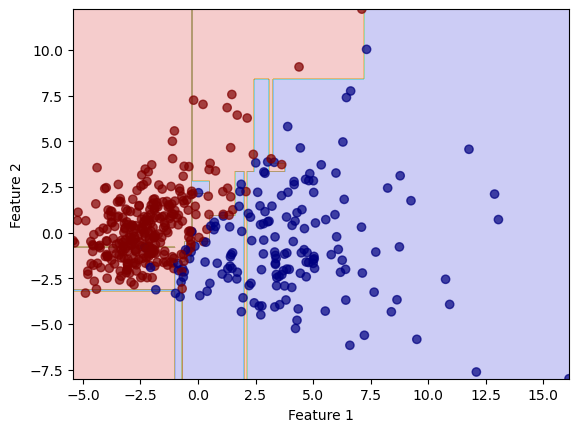

In [49]:
#### Your code here
from sklearn.tree import DecisionTreeClassifier

i=1
best = 0
best_depth = 0
while i<20:
    Tree = DecisionTreeClassifier(max_depth=i).fit(X_pca, y_train)

    # test accuracy
    y_pred = Tree.predict(X_test_pca)
    acc = Tree.score(X_test_pca, y_test)
    print(f'Test accuracy for depth of {i} is {acc:.2f}')
    if acc>best:
        best=acc
        best_depth = i 
    i = i+1
    
print(f'Best depth is {best_depth}')
    
# Plot decision region for the best decision tree model
best_tree = DecisionTreeClassifier(max_depth=i)
best_tree.fit(X_pca, y_train)
plot_regions(best_tree, X_pca, y_train)

#### 3(g) Train random forest

You should try different `max_depth` and `n_estimators`, then select the best hyperparameters.

Print the test accuracy for all models, and draw the decision region of the model with selected `max_depth` and `n_estimators`.

Random Forest with max_depth=1 and n_estimators=50: Test accuracy = 0.94
Random Forest with max_depth=1 and n_estimators=100: Test accuracy = 0.95
Random Forest with max_depth=1 and n_estimators=150: Test accuracy = 0.96
Random Forest with max_depth=1 and n_estimators=200: Test accuracy = 0.94
Random Forest with max_depth=2 and n_estimators=50: Test accuracy = 0.96
Random Forest with max_depth=2 and n_estimators=100: Test accuracy = 0.95
Random Forest with max_depth=2 and n_estimators=150: Test accuracy = 0.96
Random Forest with max_depth=2 and n_estimators=200: Test accuracy = 0.96
Random Forest with max_depth=3 and n_estimators=50: Test accuracy = 0.94
Random Forest with max_depth=3 and n_estimators=100: Test accuracy = 0.96
Random Forest with max_depth=3 and n_estimators=150: Test accuracy = 0.96
Random Forest with max_depth=3 and n_estimators=200: Test accuracy = 0.95
Random Forest with max_depth=4 and n_estimators=50: Test accuracy = 0.96
Random Forest with max_depth=4 and n_estim

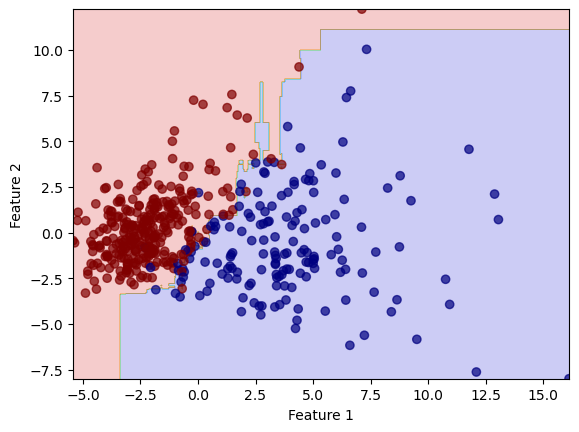

In [50]:
from sklearn.ensemble import RandomForestClassifier

best_accuracy = 0
best_max_depth = 0
best_n_estimators = 0

i = 1
while i <= 20:
    j = 50
    while j <= 200:
        rf = RandomForestClassifier(max_depth=i, n_estimators=j)
        rf.fit(X_pca, y_train)
        accuracy = rf.score(X_test_pca, y_test)
        
        print(f'Random Forest with max_depth={i} and n_estimators={j}: Test accuracy = {accuracy:.2f}')
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_max_depth = i
            best_n_estimators = j
        
        j += 50
    i += 1

print(f'Best Random Forest model has max_depth={best_max_depth} and n_estimators={best_n_estimators} with test accuracy = {best_accuracy:.2f}')

# Train the Random Forest Classifier with the best parameters
best_rf = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators)
best_rf.fit(X_pca, y_train)

# Plot decision region for the best Random Forest model
plot_regions(best_rf, X_pca, y_train)

#### 3(h) Train max voting classifier

You should use the hyperparameters you select before. 

Print the test accuracy, and draw the decision region.

Accuracies:
KNeighborsClassifier 0.956140350877193
LogisticRegression 0.9473684210526315
DecisionTreeClassifier 0.9649122807017544
RandomForestClassifier 0.956140350877193
VotingClassifier 0.956140350877193


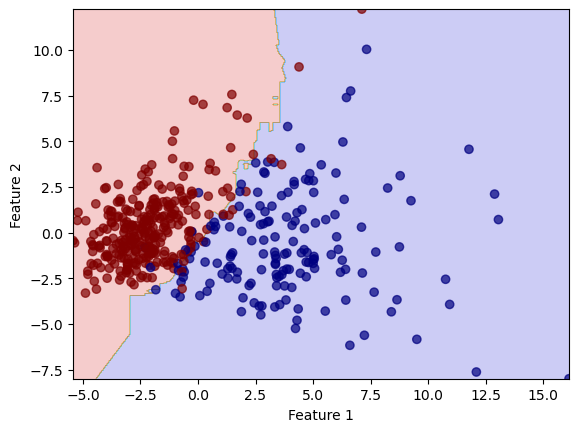

In [51]:
#### Your code here
from sklearn.ensemble import VotingClassifier

# define classifiers with best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_log = LogisticRegression()
best_tree = DecisionTreeClassifier(max_depth=best_depth)
best_rf = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators)

# define max vote classifier
voting_clf = VotingClassifier(estimators=[('knn', best_knn), ('log', best_log), ('tree', best_tree), ('rf', best_rf)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_pca, y_train)

#each classifier's accuracy:
print("Accuracies:")
for clf in (best_knn, best_log, best_tree, best_rf, voting_clf):
    
    clf.fit(X_pca, y_train)
    acc = clf.score(X_test_pca, y_test)
    print(clf.__class__.__name__, acc)
    
# Plot decision region for the voting classifier
plot_regions(voting_clf, X_pca, y_train)